In [1]:
import os
from datetime import datetime
import pandas as pd

# Parameters

In [2]:
# Parameters dictionary.
pm = {
    'ticker': 'GOOGL',
    'start_date_train': datetime(2022,1,1),
    'end_date_train': datetime(2022,11,1),
    'start_date_test': datetime(2022,11,1),
    'end_date_test': datetime(2023,1,1),
}

⭕ **Possible Improvements:**

* The date range for the market data (dependent variable) could be larger than the date range for the news, since there may be a time lag.
* Test for a number of years.
* Play with what text columns are included or not.
* Test if weighting articles by how much a company is mentioned in the article improves predictions.
* Inspect how the number of articles published changes things.

# YFinance Data

In [3]:
import yfinance as yf

In [4]:
yticker = yf.Ticker( pm['ticker'] )

In [5]:
history = yticker.history(
    start = pm['start_date_train'],
    end = pm['end_date_train'],
)

In [6]:
history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,145.054993,145.850998,143.712997,144.991501,28646000,0.0,0.0
2022-01-04 00:00:00-05:00,145.395996,146.485001,143.716507,144.399506,28400000,0.0,0.0
2022-01-05 00:00:00-05:00,144.419998,144.499496,137.688004,137.774994,54618000,0.0,0.0
2022-01-06 00:00:00-05:00,136.998505,139.940002,136.558502,137.747498,37348000,0.0,0.0
2022-01-07 00:00:00-05:00,138.145493,138.448502,135.766495,137.016998,29760000,0.0,0.0


# Inspect the Data

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style( 'whitegrid' )

Text(0, 0.5, 'closing price')

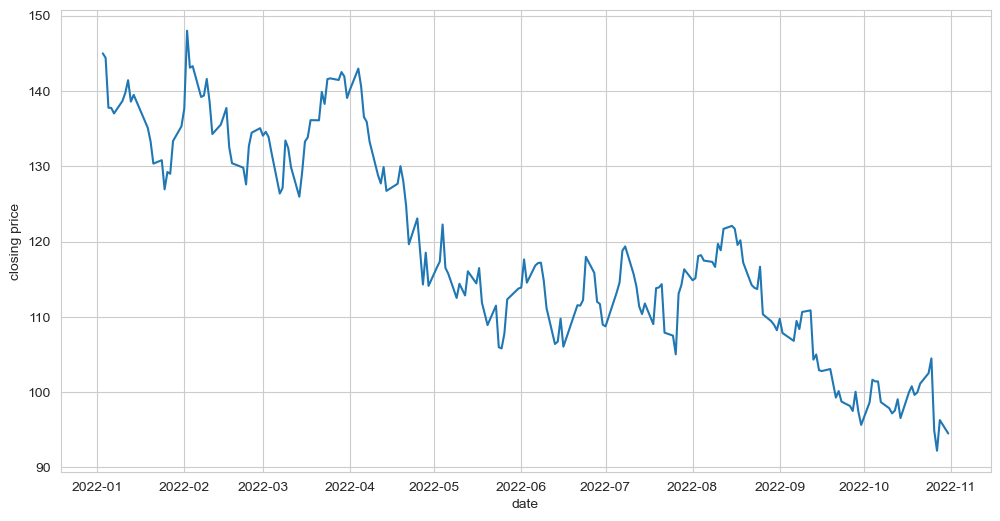

In [8]:
fig = plt.figure( figsize=(12,6) )
ax = plt.gca()

ax.plot(
    history.index,
    history['Close'],
)

ax.set_xlabel( 'date' )
ax.set_ylabel( 'closing price' )

# Save to CSV

In [10]:
history.to_csv( '../test_data/markets.csv' )